Import necessary libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
ctd = pd.read_csv('D:\Downloads\predicting-coupon-redemption\customer_transaction_data.csv')

In [59]:

print(ctd.shape)
print(ctd.head())

(1324566, 7)
         date  customer_id  item_id  quantity  selling_price  other_discount  \
0  2012-01-02         1501    26830         1          35.26          -10.69   
1  2012-01-02         1501    54253         1          53.43          -13.89   
2  2012-01-02         1501    31962         1         106.50          -14.25   
3  2012-01-02         1501    33647         1          67.32            0.00   
4  2012-01-02         1501    48199         1          71.24          -28.14   

   coupon_discount  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


In [60]:
ctd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


Checking for any null values

In [61]:
ctd.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [62]:
ctd = ctd.drop_duplicates()

In [63]:
ctd.shape

(1321650, 7)

In [64]:
ctd['TotalPrice'] = (ctd['selling_price']) - (ctd['other_discount'] + ctd['coupon_discount'])

In [65]:
ctd.head()


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,TotalPrice
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,45.95
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,67.32
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,120.75
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,67.32
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,99.38


In [66]:
ctd_merge = ctd.groupby(['customer_id','date']).agg({'TotalPrice': 'sum','selling_price':'sum','other_discount':'sum'
                                                    ,'coupon_discount':'sum'})

In [67]:
ctd_merge.head()

TotalPrice  selling_price  other_discount  \
customer_id date                                                    
1           2012-02-21     3176.91        2603.45         -537.84   
            2012-03-08     1737.18        1431.20         -305.98   
            2012-03-29      871.61         691.73         -179.88   
            2012-04-04     2262.58        1913.50         -331.27   
            2012-04-11     2248.69        1702.28         -546.41   

                        coupon_discount  
customer_id date                         
1           2012-02-21           -35.62  
            2012-03-08             0.00  
            2012-03-29             0.00  
            2012-04-04           -17.81  
            2012-04-11             0.00

In [68]:
ctd_merge=ctd_merge.reset_index()

In [69]:
ctd_merge.head()

,customer_id,date,TotalPrice,selling_price,other_discount,coupon_discount
0,1,2012-02-21,3176.91,2603.45,-537.84,-35.62
1,1,2012-03-08,1737.18,1431.20,-305.98,0.00
2,1,2012-03-29,871.61,691.73,-179.88,0.00
3,1,2012-04-04,2262.58,1913.50,-331.27,-17.81
4,1,2012-04-11,2248.69,1702.28,-546.41,0.00


In [70]:
ctd_merge['InvoiceNo']= ctd_merge['date'].map(str) + ctd_merge['customer_id'].map(str) 

In [71]:
ctd_merge.head()

,customer_id,date,TotalPrice,selling_price,other_discount,coupon_discount,InvoiceNo
0,1,2012-02-21,3176.91,2603.45,-537.84,-35.62,2012-02-211
1,1,2012-03-08,1737.18,1431.20,-305.98,0.00,2012-03-081
2,1,2012-03-29,871.61,691.73,-179.88,0.00,2012-03-291
3,1,2012-04-04,2262.58,1913.50,-331.27,-17.81,2012-04-041
4,1,2012-04-11,2248.69,1702.28,-546.41,0.00,2012-04-111


In [72]:
ctd_merge.to_csv('Customer_transactions_agg')

In [73]:
print('Min:{}; Max:{}'.format(ctd_merge["date"].min(), ctd_merge["date"].max()))

Min:2012-01-02; Max:2013-07-03


In [74]:
ctd_merge = ctd_merge[ (ctd_merge['date']>'2012-01-02') & (ctd_merge['date'] < '2013-01-03')]

In [75]:
ctd_merge.head()

,customer_id,date,TotalPrice,selling_price,other_discount,coupon_discount,InvoiceNo
0,1,2012-02-21,3176.91,2603.45,-537.84,-35.62,2012-02-211
1,1,2012-03-08,1737.18,1431.20,-305.98,0.00,2012-03-081
2,1,2012-03-29,871.61,691.73,-179.88,0.00,2012-03-291
3,1,2012-04-04,2262.58,1913.50,-331.27,-17.81,2012-04-041
4,1,2012-04-11,2248.69,1702.28,-546.41,0.00,2012-04-111


In [76]:
import datetime as dt
current_date = dt.datetime(2013,1,2)
current_date
print(ctd_merge.date.dtype)
ctd_merge['date'] = pd.to_datetime(ctd_merge['date'])
print(ctd_merge.date.dtype)

object
datetime64[ns]


In [77]:
ctd_merge = ctd_merge.groupby(['customer_id']).agg({ 'date': lambda x: (current_date - x.max()).days, 'InvoiceNo': 'count',
'TotalPrice': 'sum'})

In [78]:
ctd_merge.head()

,date,InvoiceNo,TotalPrice
customer_id,,,
1,6,33,75022.24
2,22,28,34551.57
3,1,29,76057.24
4,9,22,34199.71
5,1,92,70552.77


In [79]:
ctd_merge.tail()

,date,InvoiceNo,TotalPrice
customer_id,,,
1578,5,19,50913.34
1579,2,92,104205.49
1580,1,56,31368.86
1581,12,36,33769.82
1582,0,31,67666.99


In [80]:
ctd_merge.rename(columns = {'date': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)

In [81]:
ctd_merge=ctd_merge.reset_index()

In [82]:
ctd_merge.head()

,customer_id,Recency,Frequency,Monetary
0,1,6,33,75022.24
1,2,22,28,34551.57
2,3,1,29,76057.24
3,4,9,22,34199.71
4,5,1,92,70552.77


In [83]:
ctd_merge['Rank_recency_dense'] = ctd_merge.Recency.rank(method='dense').astype(int)
ctd_merge['Rank_freq_dense']= ctd_merge.Frequency.rank(method= 'dense',ascending=False ).astype(int)
ctd_merge['Rank_monetary_dense']=ctd_merge.Monetary.rank(method='dense',ascending=False).astype(int)

In [84]:
ctd_merge.head()

,customer_id,Recency,Frequency,Monetary,Rank_recency_dense,Rank_freq_dense,Rank_monetary_dense
0,1,6,33,75022.24,7,148,520
1,2,22,28,34551.57,23,153,1110
2,3,1,29,76057.24,2,152,512
3,4,9,22,34199.71,10,159,1121
4,5,1,92,70552.77,2,89,566


In [85]:
ctd_merge['Rank_recency_dense'].value_counts()



1     280
2     185
3     147
5     146
6     127
4     112
7      73
8      49
9      48
13     38
10     37
11     35
12     29
14     28
16     18
15     16
17     16
19     12
20     11
21     11
28     10
25      8
18      8
24      7
36      6
23      6
27      6
45      6
31      5
26      5
     ... 
82      1
78      1
81      1
73      1
74      1
75      1
86      1
77      1
76      1
62      1
68      1
66      1
60      1
59      1
58      1
57      1
54      1
53      1
52      1
49      1
48      1
89      1
44      1
43      1
42      1
39      1
38      1
63      1
61      1
90      1
Name: Rank_recency_dense, Length: 90, dtype: int64

In [86]:
ctd_merge['Rank_freq_dense'].value_counts()

145    34
141    30
146    29
147    29
135    28
148    28
143    27
154    27
139    26
155    26
126    26
149    26
132    26
158    26
129    25
144    24
161    24
160    24
142    23
136    22
151    22
152    20
153    20
156    20
133    20
130    20
134    20
119    19
140    19
131    19
       ..
3       1
11      1
4       1
5       1
10      1
9       1
22      1
179     1
24      1
25      1
62      1
59      1
58      1
57      1
56      1
51      1
49      1
47      1
46      1
43      1
39      1
37      1
34      1
31      1
30      1
29      1
28      1
27      1
26      1
1       1
Name: Rank_freq_dense, Length: 179, dtype: int64

In [87]:
ctd_merge['Rank_monetary_dense'].value_counts()

1581    1
1038    1
1042    1
1044    1
1046    1
1048    1
1050    1
1052    1
1054    1
1056    1
1058    1
1060    1
1062    1
1064    1
1066    1
1068    1
1070    1
1072    1
1074    1
1076    1
1078    1
1080    1
1082    1
1040    1
1036    1
988     1
1034    1
992     1
994     1
996     1
       ..
579     1
581     1
583     1
585     1
587     1
545     1
543     1
541     1
517     1
499     1
501     1
503     1
505     1
507     1
509     1
511     1
513     1
515     1
519     1
539     1
521     1
523     1
525     1
527     1
529     1
531     1
533     1
535     1
537     1
2       1
Name: Rank_monetary_dense, Length: 1581, dtype: int64

In [88]:
ctd_merge['rfm_score']= ((ctd_merge['Rank_recency_dense'] + ctd_merge['Rank_freq_dense']+ctd_merge['Rank_monetary_dense'])/3).astype(int)

In [89]:
criteria = [ctd_merge['rfm_score'].between(0, 100), ctd_merge['rfm_score'].between(101, 300), ctd_merge['rfm_score'].between(301, 500),ctd_merge['rfm_score'].between(501, 700), ctd_merge['rfm_score'].between(701, 900)]
values = [1, 2, 3, 4,5]

ctd_merge['rfm_rank'] = np.select(criteria, values, 5)

In [90]:
ctd_merge.head()

,customer_id,Recency,Frequency,Monetary,Rank_recency_dense,Rank_freq_dense,Rank_monetary_dense,rfm_score,rfm_rank
0,1,6,33,75022.24,7,148,520,225,2
1,2,22,28,34551.57,23,153,1110,428,3
2,3,1,29,76057.24,2,152,512,222,2
3,4,9,22,34199.71,10,159,1121,430,3
4,5,1,92,70552.77,2,89,566,219,2


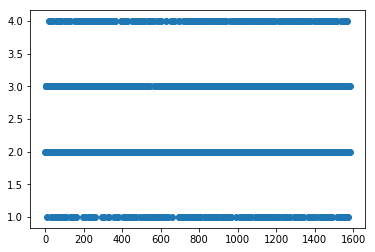

In [91]:
plt.scatter(ctd_merge.customer_id,ctd_merge.rfm_rank, marker='o')

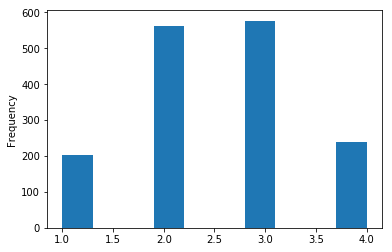

In [92]:
ctd_merge['rfm_rank'].plot(kind='hist')

In [93]:
ctd_merge['rfm_rank'].value_counts()

3    577
2    563
4    239
1    202
Name: rfm_rank, dtype: int64

In [94]:
ctd_merge.head()

,customer_id,Recency,Frequency,Monetary,Rank_recency_dense,Rank_freq_dense,Rank_monetary_dense,rfm_score,rfm_rank
0,1,6,33,75022.24,7,148,520,225,2
1,2,22,28,34551.57,23,153,1110,428,3
2,3,1,29,76057.24,2,152,512,222,2
3,4,9,22,34199.71,10,159,1121,430,3
4,5,1,92,70552.77,2,89,566,219,2


This is the final dataset